# Digit recognition with Tensorflow

### The data set that used in this project is MNIST data set 

installing tensorflow at conda

In [ ]:
pip install tensorflow

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the mnist dataset

loading our data set with keras tensorflow with following code box

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

## showing our data

show our data with matplotlib librery and printing our data shapes.
we have 28 * 28 images

(28, 28)


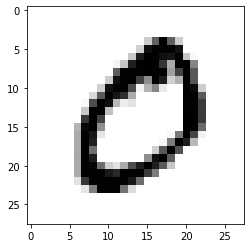

In [8]:
plt.imshow(x_train[1], cmap = plt.cm.binary)
print(x_train[1].shape)

Ok now we're printing one of the train data and we can see all of the nodes are between 0 until 255 

In [9]:
print(x_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

## Data Normalizing
dividing all the elements of our matrix by 255 so now all the elements are between 0 to 1

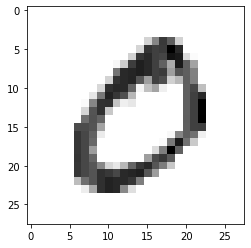

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [11]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[1], cmap = plt.cm.binary)
plt.show()
print(x_train[1])

## Augmentation

this method create another picture that like our picture in the data set with another scale or zoom
    so it help ous in modeling with highest accuracy and it Prevents overfiting

In [60]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical', input_shape=(28,28,3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
])

# Create Model
+ 1 - at first we should flatten our data it means we should convert our 3D matrix (28 * 28 * 3) to vector like :(2352 * 1)
+ 2 - now we adding another hidden layer with 256 node and set it activation function to ReLU
+ 3 - the second hidden layer with 128 node and Relu
+ 4 - the third hidden layer with 64 node and Relu
+ 5 - the forth hidden layer with 32 node and Relu
+ 6 - Finally we should add Dense layer for output layer with 10 node ( we have 10 class ) and set it layer activation funciton Softmax because we have multiclass Neural Network (if our data is binory we should using Sigmoid)

## Compiling model
and then compiling our model with "sparse_categorical_crossentropy" and adam optimizer

In [61]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dense(32, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax"),
])
model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam" , metrics = ["accuracy"])

## Model fitting
Now our model is ready so we fit our model with train data and setting 20 eposch with 50 steps

In [62]:
model_fit = model.fit(x_train,y_train,steps_per_epoch = 50, epochs = 20)

Epoch 1/20
50/50 [==============================] - 1s 10ms/step - loss: 0.9980 - accuracy: 0.7089
Epoch 2/20
50/50 [==============================] - 1s 10ms/step - loss: 0.2728 - accuracy: 0.9202
Epoch 3/20
50/50 [==============================] - 1s 10ms/step - loss: 0.1912 - accuracy: 0.9439
Epoch 4/20
50/50 [==============================] - 1s 10ms/step - loss: 0.1487 - accuracy: 0.9566
Epoch 5/20
50/50 [==============================] - 1s 10ms/step - loss: 0.1231 - accuracy: 0.9637
Epoch 6/20
50/50 [==============================] - 1s 10ms/step - loss: 0.1046 - accuracy: 0.9689
Epoch 7/20
50/50 [==============================] - 1s 10ms/step - loss: 0.0874 - accuracy: 0.9737
Epoch 8/20
50/50 [==============================] - 1s 10ms/step - loss: 0.0728 - accuracy: 0.9790
Epoch 9/20
50/50 [==============================] - 1s 10ms/step - loss: 0.0637 - accuracy: 0.9817
Epoch 10/20
50/50 [==============================] - 1s 10ms/step - loss: 0.0550 - accuracy: 0.9843
Epoch 11/

## Model Evaluation
Now printing the loss and acc value of the model

In [63]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1053 - accuracy: 0.9745
0.10533665865659714 0.9745000004768372


## saving the model

save the model with "digit_recognition_model" because we need to saving model for predicting a new data

In [53]:
model.save("digit_recognition_model")
NewModel = tf.keras.models.load_model("digit_recognition_model")

INFO:tensorflow:Assets written to: digit_recognition_model\assets


## Predicting test set

In [54]:
predict = NewModel.predict([x_test])

313/313 [==============================] - 1s 3ms/step


Yes i know it was so weird :)

In [55]:
print(predict)

[[1.93063499e-09 6.88495749e-09 3.78128880e-06 ... 9.99993682e-01
  6.20156981e-10 9.27398780e-09]
 [9.09730277e-12 6.11278165e-06 9.99993563e-01 ... 1.60137844e-07
  1.77830239e-09 2.59524939e-16]
 [7.32138096e-06 9.99500632e-01 1.25211618e-05 ... 1.04016535e-05
  4.32380679e-04 1.09351515e-06]
 ...
 [1.45124201e-12 5.47899087e-11 1.13437766e-11 ... 4.12324797e-09
  7.66857852e-07 2.33966466e-06]
 [7.54055662e-09 2.72264961e-10 1.43401718e-12 ... 6.41222915e-14
  4.94939650e-06 5.79787225e-11]
 [7.73815464e-06 1.01848858e-08 5.03349156e-07 ... 3.08075718e-11
  1.56437530e-08 8.81518261e-11]]


# Result

in the following block you can see accuracy of the model and it predicts all the 9 example

7
2
1
0
4
1
4
9
5


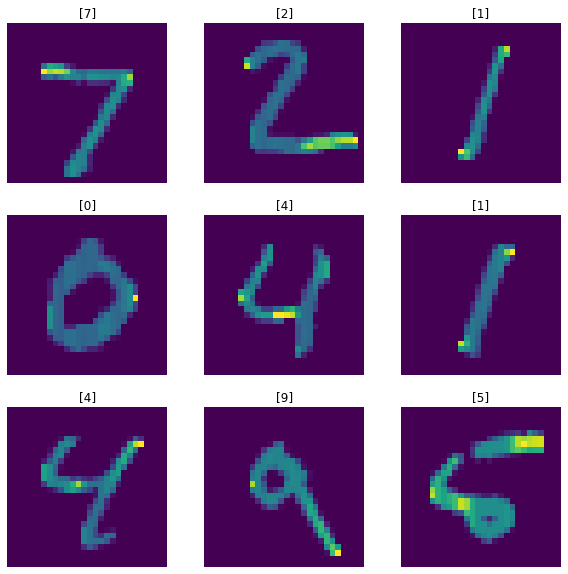

In [72]:
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(x_test[i])
  plt.title([y_test[i]])
  print(np.argmax(predict[i]))
  plt.axis("off")